In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io

from src.QM7Dataset import load_QM7, QM7Data

In [2]:
df = pd.read_table('data/results/2023-03-10_hyperparam_opt_3.txt')

In [3]:
df.head()

,l2_reg,max_singular_val,min_singular_val,n_features,n_test,n_train,n_val,random_weights_scale,test_MAE,train_MAE,val_MAE,with_directional_info
0,0.000000e+00,2.863933,7.051967e-09,100,1433,5159,573,0.01,54.208400,52.065940,55.220367,True
1,1.000000e-07,2.863933,7.051967e-09,100,1433,5159,573,0.01,53.425150,52.692795,53.709520,True
2,1.000000e-06,2.863933,7.051967e-09,100,1433,5159,573,0.01,53.425613,52.693290,53.709934,True
3,1.000000e-05,2.863933,7.051967e-09,100,1433,5159,573,0.01,53.425520,52.693460,53.709457,True
4,1.000000e-04,2.863933,7.051967e-09,100,1433,5159,573,0.01,53.424220,52.694720,53.704550,True


In [4]:
df.columns

Index(['l2_reg', 'max_singular_val', 'min_singular_val', 'n_features',
       'n_test', 'n_train', 'n_val', 'random_weights_scale', 'test_MAE',
       'train_MAE', 'val_MAE', 'with_directional_info'],
      dtype='object')

In [5]:
df.shape

(480, 12)

In [6]:
keep_cols = ['l2_reg', 'n_features',
      'random_weights_scale', 'with_directional_info', 'test_MAE',
       'train_MAE', 'val_MAE']

In [7]:
df[df['with_directional_info']][keep_cols].sort_values('val_MAE', ascending=True).head(50)

,l2_reg,n_features,random_weights_scale,with_directional_info,test_MAE,train_MAE,val_MAE
29,1.000000e-03,100,10.0,True,39.163690,35.950798,38.867836
30,1.000000e-02,100,10.0,True,39.240430,36.466225,38.976162
174,1.000000e-01,200,10.0,True,38.336227,35.239407,39.258644
28,1.000000e-04,100,10.0,True,39.107440,35.543186,39.449947
255,1.000000e-01,500,10.0,True,38.212250,34.644794,39.605892
31,1.000000e-01,100,10.0,True,39.567580,37.350300,39.624120
172,1.000000e-02,200,10.0,True,38.233856,34.495840,39.784954
254,1.000000e-02,500,10.0,True,38.904465,33.683540,39.834526
170,1.000000e-03,200,10.0,True,38.287537,33.921790,40.092674
253,1.000000e-03,500,10.0,True,39.477467,32.371174,40.162970


In [9]:
df[~df['with_directional_info']][keep_cols].sort_values('val_MAE', ascending=True).head(50)

,l2_reg,n_features,random_weights_scale,with_directional_info,test_MAE,train_MAE,val_MAE
415,0.100000,2000,1000.0,False,0.254481,0.110253,0.197681
199,0.100000,500,1000.0,False,0.214188,0.123033,0.204414
150,0.010000,200,100.0,False,0.218835,0.192781,0.205070
127,0.100000,200,1000.0,False,0.224028,0.126857,0.206240
151,0.100000,200,100.0,False,0.219383,0.194721,0.207316
149,0.001000,200,100.0,False,0.219431,0.196110,0.209584
71,0.100000,100,1000.0,False,0.195258,0.135065,0.209726
391,0.100000,2000,100.0,False,0.275729,0.193664,0.211555
126,0.010000,200,1000.0,False,0.271005,0.125895,0.228066
95,0.100000,100,100.0,False,0.227912,0.200094,0.236593


In [2]:
d_without = io.loadmat('data/generated/2023-03-10_run_2_weight_stddev_1000.0_n_features_2000_with_direction_F.mat')

In [4]:
d_without.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_features_singular_values', 'train_predictions', 'val_predictions', 'test_predictions', 'l2_reg_values', 'train_labels', 'val_labels', 'test_labels', 'random_weights', 'trained_weights', 'train_idxes', 'val_idxes', 'test_idxes'])

In [5]:
print(d_without['l2_reg_values'])

[[0.e+00 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]]


In [7]:
d_without_preds = d_without['test_predictions'][7].flatten()
d_without_true = d_without['test_labels'].flatten()

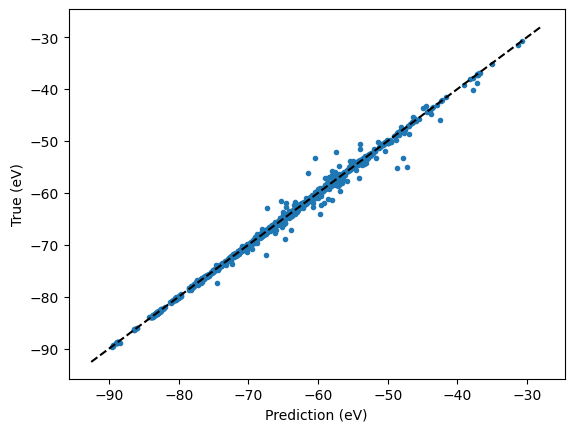

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(d_without_preds, d_without_true, '.')
ax.plot(ax.get_xlim(), ax.get_xlim(), '--', color='black')
ax.set_xlabel('Prediction (eV)')
ax.set_ylabel('True (eV)')

FP = 'data/plots/preds_vs_true_without.pdf'
plt.savefig(FP)
plt.show()
plt.clf()

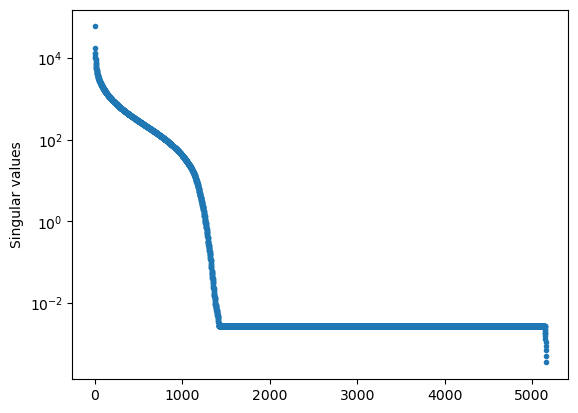

<Figure size 640x480 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(d_without['train_features_singular_values'].flatten(), '.')
ax.set_yscale('log')
# ax.plot(ax.get_xlim(), ax.get_xlim(), '--', color='black')
# ax.set_xlabel('Prediction (eV)')
ax.set_ylabel('Singular values')

FP = 'data/plots/svd_without.pdf'
plt.savefig(FP)
plt.show()
plt.clf()

In [10]:
q, _, _ = load_QM7('data/qm7/qm7.mat', n_train=7165, n_test=0, validation_set_fraction=0, permute_samples=False)

In [11]:
assert len(q) == 7165

In [12]:
test_idxes = d_without['test_idxes'].flatten()
q_test = QM7Data(q.coords[test_idxes],
                q.charges[test_idxes], 
                q.atomization_energies[test_idxes])

In [14]:
print(np.allclose(q_test.atomization_energies, d_without_true))

True


In [15]:
errors = np.abs(q_test.atomization_energies - d_without_preds)

In [16]:
sing_vals_0_1 = []
sing_vals_1_2 = []
for i in range(len(q_test)):
    n_atoms_i = q_test.n_atoms[i]
    coords_i = q_test.coords[i, :n_atoms_i]
    s = np.linalg.svd(coords_i, compute_uv=False)
    sing_vals_0_1.append(s[1] / s[0])
    sing_vals_1_2.append(s[2] / s[1])

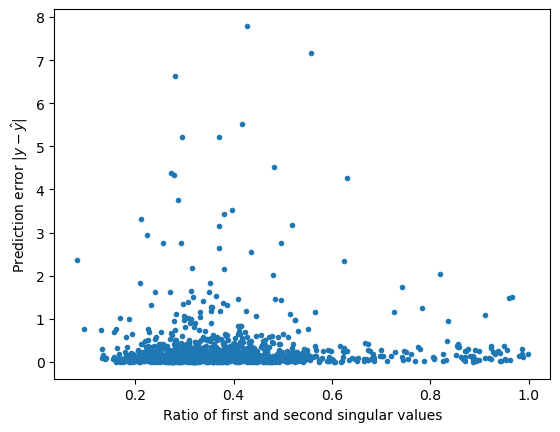

<Figure size 640x480 with 0 Axes>

In [17]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(sing_vals_0_1, errors, '.')
# ax.plot(ax.get_xlim(), ax.get_xlim(), '--', color='black')
ax.set_xlabel('Ratio of first and second singular values')
ax.set_ylabel('Prediction error $|y - \\hat{y}|$')

FP = 'data/plots/sing_val_0_vs_error_without.pdf'
plt.savefig(FP)
plt.show()
plt.clf()

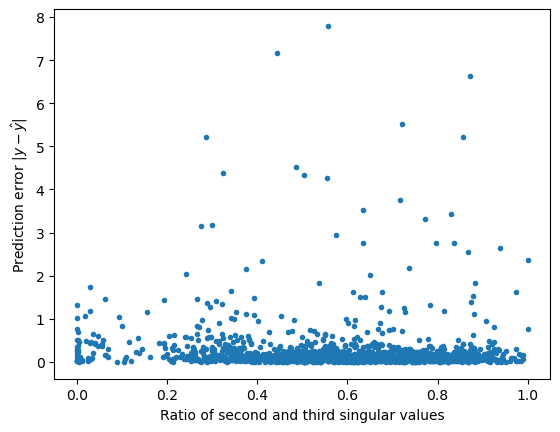

<Figure size 640x480 with 0 Axes>

In [18]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(sing_vals_1_2, errors, '.')
# ax.plot(ax.get_xlim(), ax.get_xlim(), '--', color='black')
ax.set_xlabel('Ratio of second and third singular values')
ax.set_ylabel('Prediction error $|y - \\hat{y}|$')

FP = 'data/plots/sing_val_1_vs_error_without.pdf'
plt.savefig(FP)
plt.show()
plt.clf()

In [11]:
d_with = io.loadmat('data/generated/2023-03-10_run_2_weight_stddev_10.0_n_features_100_with_direction_T.mat')

In [12]:
d_with.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_features_singular_values', 'train_predictions', 'val_predictions', 'test_predictions', 'l2_reg_values', 'train_labels', 'val_labels', 'test_labels', 'random_weights', 'trained_weights', 'train_idxes', 'val_idxes', 'test_idxes'])

In [13]:
print(d_with['l2_reg_values'])

[[0.e+00 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]]


In [16]:
d_with_preds = d_with['test_predictions'][5].flatten()
d_with_true = d_with['test_labels'].flatten()

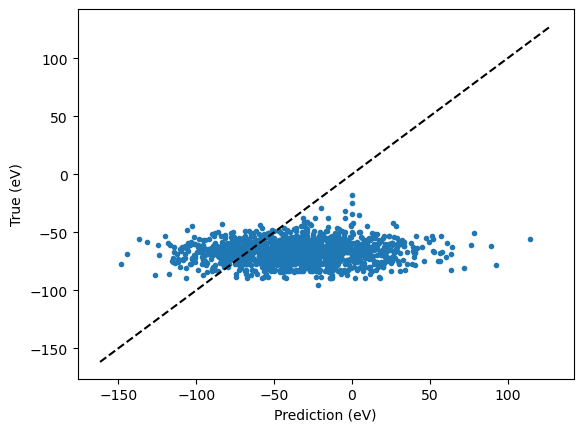

<Figure size 640x480 with 0 Axes>

In [19]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(d_with_preds, d_with_true, '.')
ax.plot(ax.get_xlim(), ax.get_xlim(), '--', color='black')
ax.set_xlabel('Prediction (eV)')
ax.set_ylabel('True (eV)')

FP = 'data/plots/preds_vs_true_with.pdf'
plt.savefig(FP)
plt.show()
plt.clf()

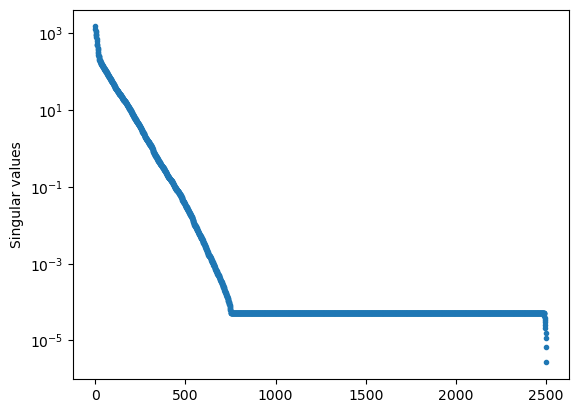

<Figure size 640x480 with 0 Axes>

In [33]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(d_with['train_features_singular_values'].flatten(), '.')
ax.set_yscale('log')
# ax.plot(ax.get_xlim(), ax.get_xlim(), '--', color='black')
# ax.set_xlabel('Prediction (eV)')
ax.set_ylabel('Singular values')

FP = 'data/plots/svd_with.pdf'
plt.savefig(FP)
plt.show()
plt.clf()

In [23]:
q, _, _ = load_QM7('data/qm7/qm7.mat', n_train=7165, n_test=0, validation_set_fraction=0, permute_samples=False)

In [24]:
assert len(q) == 7165

In [26]:
test_idxes = d_with['test_idxes'].flatten()
q_test = QM7Data(q.coords[test_idxes],
                q.charges[test_idxes], 
                q.atomization_energies[test_idxes])

In [29]:
print(np.allclose(q_test.atomization_energies, d_with_true))

True


In [32]:
errors = np.abs(q_test.atomization_energies - d_with_preds)

In [31]:
sing_vals_0_1 = []
sing_vals_1_2 = []
for i in range(len(q_test)):
    n_atoms_i = q_test.n_atoms[i]
    coords_i = q_test.coords[i, :n_atoms_i]
    s = np.linalg.svd(coords_i, compute_uv=False)
    sing_vals_0_1.append(s[1] / s[0])
    sing_vals_1_2.append(s[2] / s[1])

/tmp/ipykernel_1710658/282748811.py:8: RuntimeWarning: invalid value encountered in float_scalars
  sing_vals_1_2.append(s[2] / s[1])


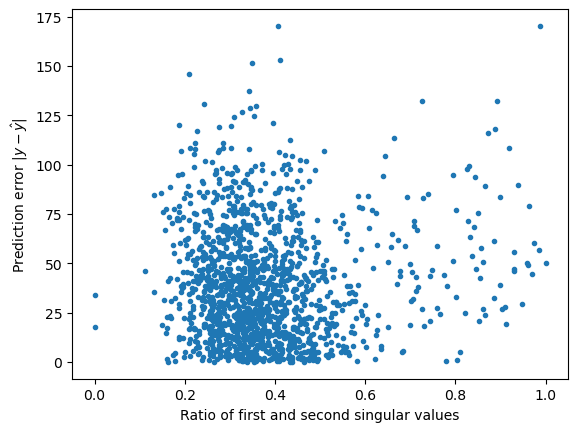

<Figure size 640x480 with 0 Axes>

In [37]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(sing_vals_0_1, errors, '.')
# ax.plot(ax.get_xlim(), ax.get_xlim(), '--', color='black')
ax.set_xlabel('Ratio of first and second singular values')
ax.set_ylabel('Prediction error $|y - \\hat{y}|$')

FP = 'data/plots/sing_val_0_vs_error_with.pdf'
plt.savefig(FP)
plt.show()
plt.clf()

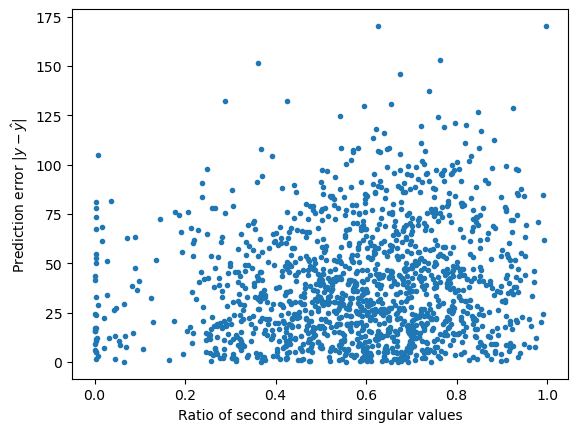

<Figure size 640x480 with 0 Axes>

In [38]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(sing_vals_1_2, errors, '.')
# ax.plot(ax.get_xlim(), ax.get_xlim(), '--', color='black')
ax.set_xlabel('Ratio of second and third singular values')
ax.set_ylabel('Prediction error $|y - \\hat{y}|$')

FP = 'data/plots/sing_val_1_vs_error_with.pdf'
plt.savefig(FP)
plt.show()
plt.clf()

In [15]:
b = df[df['with_directional_info'] == True]

TypeError: bad operand type for unary ~: 'float'